(mean(A), var(A)) = (1.0, 1.0060849464844528)


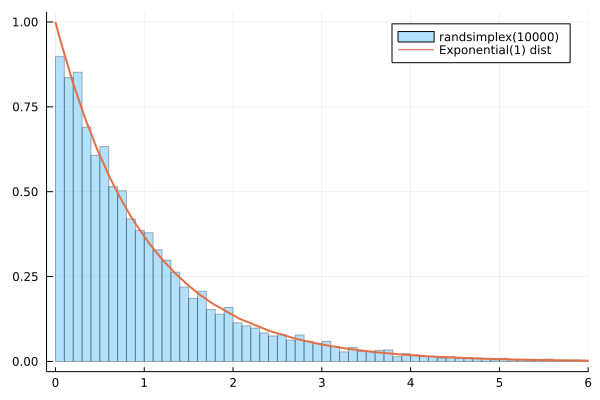

In [1]:
using Random, Statistics, Plots

function diff!(X)
    @inbounds for i in reverse(keys(X)[begin:end-1])
        X[i+1] -= X[i]
    end
    X
end

function randsimplex!(rng::AbstractRNG, X)
    X[end] = one(eltype(X))
    Y = @view X[begin:end-1]
    rand!(rng, Y)
    sort!(Y)
    X .*= length(X)
    diff!(X)
end
randsimplex(rng::AbstractRNG, N, T=Float64) = randsimplex!(rng, Vector{T}(undef, N))
randsimplex!(X) = randsimplex!(Random.default_rng(), X)
randsimplex(N, T=Float64) = randsimplex!(Vector{T}(undef, N))

n = 10^4
A = randsimplex(n)
@show mean(A), var(A)
histogram(A; norm=true, alpha=0.3, label="randsimplex($n)")
plot!(x->exp(-x), 0, 6; xlim=(-0.1, 6), lw=2, label="Exponential(1) dist")

In [2]:
struct Simplex{T} N::Int end
Simplex(N) = Simplex{Float64}(N)

function Random.rand!(rng::AbstractRNG,
        X::AbstractVector{T}, d::Random.SamplerTrivial{Simplex{T}}) where T
    @assert length(X) == d[].N
    randsimplex!(rng, X)
end
Base.rand(rng::AbstractRNG, d::Random.SamplerTrivial{Simplex{T}}) where T =
    rand!(rng, Vector{T}(undef, d[].N), d)

In [3]:
using BenchmarkTools

X = zeros(10)
d = Simplex(10)
@btime rand!($X, $d)

  123.476 ns (0 allocations: 0 bytes)


10-element Vector{Float64}:
 0.39332287888733664
 1.8695014479820813
 2.1216403297243884
 0.16660716587379198
 2.497212510234979
 1.1789003961608273
 0.28041650773159965
 0.0535885373028524
 0.7846005747301223
 0.654209651372021

In [4]:
rand(Simplex(10))

10-element Vector{Float64}:
 0.17756275977921177
 0.513852515111588
 0.3268472528211197
 0.7409706022315765
 0.9031989222519385
 0.37296455567938613
 2.1765587763355163
 0.5451115353824356
 4.176911842695529
 0.06602123771169843

(mean(A), var(A)) = (0.015999407636018818, 0.9998440033556322)


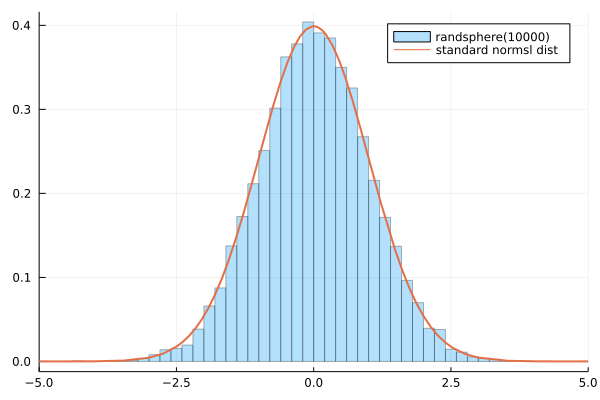

In [5]:
using Random, LinearAlgebra, Statistics, Plots

function randsphere!(rng::AbstractRNG, X)
    randn!(X)
    X .*= √(length(X)) / norm(X)
end
randsphere(rng::AbstractRNG, N, T=Float64) = randsphere!(rng, Vector{T}(undef, N))
randsphere!(X) = randsphere!(Random.default_rng(), X)
randsphere(N, T=Float64) = randsphere!(Vector{T}(undef, N))

n = 10^4
A = randsphere(n)
@show mean(A), var(A)
histogram(A; norm=true, alpha=0.3, xlim=(-5, 5), label="randsphere($n)")
plot!(x->exp(-x^2/2)/√(2π), -5, 5; lw=2, label="standard normsl dist")